In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
df=pd.read_csv("C://Users//ASUS//Downloads//My Projects//Machine Learning Projects//Wine quality Prediction//winequalityN.csv")

In [3]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
df.type.value_counts

<bound method IndexOpsMixin.value_counts of 0       white
1       white
2       white
3       white
4       white
        ...  
6492      red
6493      red
6494      red
6495      red
6496      red
Name: type, Length: 6497, dtype: object>

In [5]:
df['type'].value_counts()

type
white    4898
red      1599
Name: count, dtype: int64

In [6]:
df['type'].unique()

array(['white', 'red'], dtype=object)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6487.0,7.216579,1.296750,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6489.0,0.339691,0.164649,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6494.0,0.318722,0.145265,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6495.0,5.444326,4.758125,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6495.0,0.056042,0.035036,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6488.0,3.218395,0.160748,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6493.0,0.531215,0.148814,0.22000,0.43000,0.51000,0.60000,2.00000


In [9]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [10]:
# filling missing values

for col in df.columns:
    if df[col].isnull().sum()>0:
        df[col]=df[col].fillna(df[col].mean())

In [11]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [12]:
# Finding unique values

col=df.columns
for i in col:
    print(f"{i} ----> {df[i].nunique()}")

type ----> 2
fixed acidity ----> 107
volatile acidity ----> 188
citric acid ----> 90
residual sugar ----> 317
chlorides ----> 215
free sulfur dioxide ----> 135
total sulfur dioxide ----> 276
density ----> 998
pH ----> 109
sulphates ----> 112
alcohol ----> 111
quality ----> 7


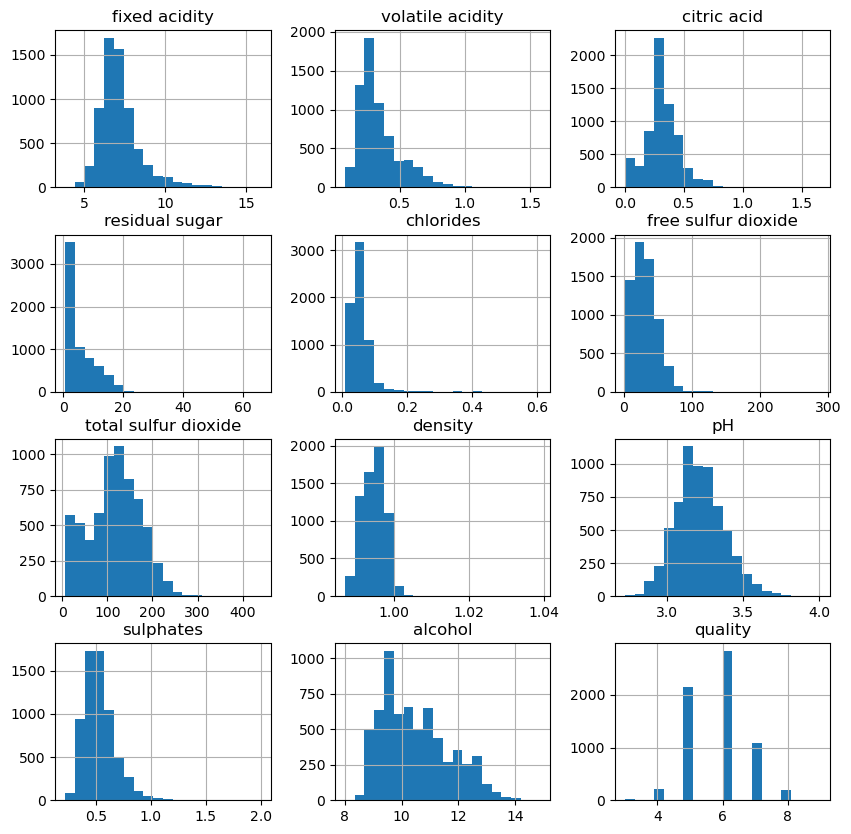

In [13]:
# Visualizing the distribution of data with the continuous values in columns in dataset

df.hist(bins=20,figsize=(10,10))
plt.show()

In [14]:
df.head()


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


<function matplotlib.pyplot.show(close=None, block=None)>

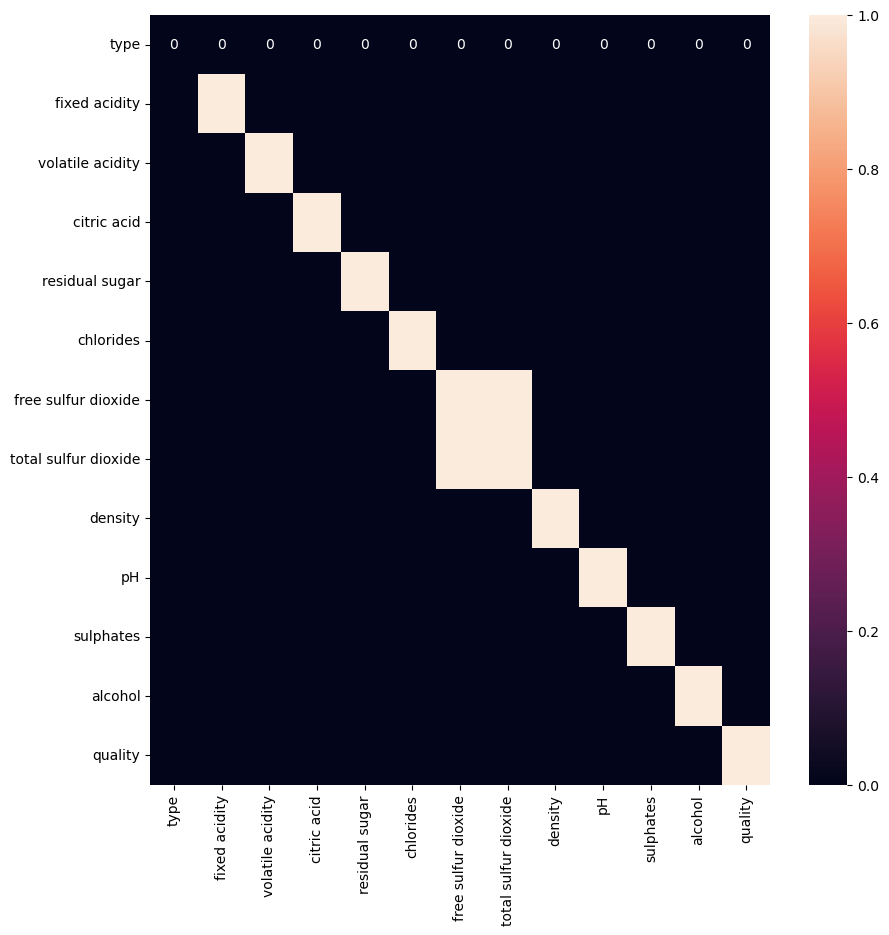

In [15]:
# converting object columns to numeric if they represent number

for col in df.columns:
    if df[col].dtype=='object':
        try:
            df[col]=pd.to_numeric(df[col],errors='coerce')
        except:
            pass

plt.figure(figsize=(10,10))
sns.heatmap(df.corr()>0.7,annot=True)
plt.show

In [16]:
# As we can see 'total sulfur dioxide' and 'free sulfur dioxide' are highly correlated features which may create redundanted data 
# Therefore will remove one of the column from the dataset

df=df.drop(['total sulfur dioxide'],axis=1)

In [17]:
df['best quality']=[1 if x>5 else 0 for x in df.quality]

In [18]:
df['best quality'].value_counts()

best quality
1    4113
0    2384
Name: count, dtype: int64

In [19]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,best quality
0,NaN,7.0,0.27,0.36,20.7,0.045,45.0,1.0010,3.00,0.45,8.8,6,1
1,NaN,6.3,0.30,0.34,1.6,0.049,14.0,0.9940,3.30,0.49,9.5,6,1
2,NaN,8.1,0.28,0.40,6.9,0.050,30.0,0.9951,3.26,0.44,10.1,6,1
3,NaN,7.2,0.23,0.32,8.5,0.058,47.0,0.9956,3.19,0.40,9.9,6,1
4,NaN,7.2,0.23,0.32,8.5,0.058,47.0,0.9956,3.19,0.40,9.9,6,1


In [20]:
x=df.drop(['quality','best quality'],axis=1)
y=df['best quality']

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=40)

In [21]:
# changing the missing values after spliting

from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='mean')
xtrain=imputer.fit_transform(xtrain)
xtest=imputer.fit_transform(xtest)

In [22]:
norm=MinMaxScaler()
xtrain=norm.fit_transform(xtrain)
xtest=norm.fit_transform(xtest)

In [23]:
models=[LogisticRegression(),XGBClassifier(),SVC(kernel='rbf')]

for i in range(3):
    models[i].fit(xtrain,ytrain)

    print(f'{models[i]}:')
    print(f'Training Accuracy: {roc_auc_score(ytrain,models[i].predict(xtrain))}')
    print(f'Validation Accuracy: {roc_auc_score(ytest,models[i].predict(xtest))}')
    print()

LogisticRegression():
Training Accuracy: 0.6975101024661644
Validation Accuracy: 0.6711031763059224

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...):
Training Accuracy: 0.9762240429934201
Validation Accuracy: 0.7100995085869576

SVC():
Training Accuracy: 0.7203202525576721
Validation Accur

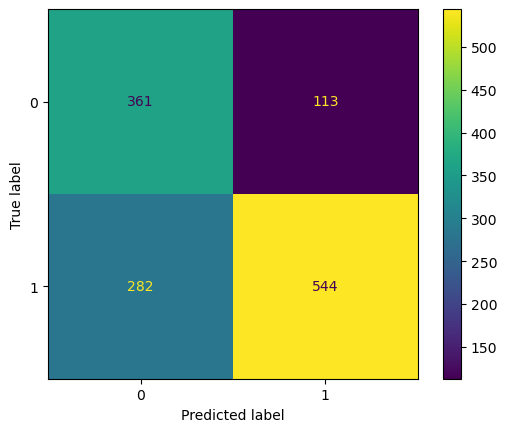

In [24]:
# As we can see that 'XGBClassifier' gave us highest accuracy 
# Therefore we will continue with XGBclassifier model

from sklearn.metrics import ConfusionMatrixDisplay
cmf=confusion_matrix(ytest,models[1].predict(xtest))
dis=ConfusionMatrixDisplay(confusion_matrix=cmf)
dis.plot()
plt.show()

In [25]:
# Classification report

from sklearn.metrics import classification_report

print(classification_report(ytest,models[1].predict(xtest)))

              precision    recall  f1-score   support

           0       0.56      0.76      0.65       474
           1       0.83      0.66      0.73       826

    accuracy                           0.70      1300
   macro avg       0.69      0.71      0.69      1300
weighted avg       0.73      0.70      0.70      1300



In [33]:
def predict_wine_quality(model, input_features):
    """
    Predicts wine quality based on input features.
    
    Parameters:
    - model: Trained machine learning model
    - input_features: List of feature values
    
    Returns:
    - Prediction: Wine quality classification (0 for low, 1 for high)
    """
    # Ensure the input is scaled using the same scaler used during training
    input_features = norm.transform([input_features])
    prediction = model.predict(input_features)
    return "High Quality" if prediction[0] == 1 else "Low Quality"

# Example feature values (you need to replace these with actual values in the order of your dataset)
example_features = [0,0,0,0,0,0,0,0.52,23,11]  # Replace with your feature set

# Using the XGBClassifier (the best model identified in your code)
trained_model = models[1]  # Assuming models[1] corresponds to XGBClassifier

# Predicting quality
quality = predict_wine_quality(trained_model, example_features)
print(f"Predicted Wine Quality: {quality}")


Predicted Wine Quality: High Quality
